In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
import pandas_datareader.data as dr
from datetime import datetime
import yfinance as yf

In [3]:
sp_df=pd.read_csv('sp500.csv').sort_index()

In [4]:
pd.unique(sp_df.Name)

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [5]:
stock_lst=['CVX','BHP','AAPL']

end=datetime.now()
start=datetime(end.year-1, end.month,end.day)

In [6]:
for stock in stock_lst:
    globals()[stock]=yf.download(stock_lst,start,end)

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [7]:
CVX.describe()

Price    Adj Close                               Close              \
Ticker        AAPL         BHP         CVX        AAPL         BHP   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    180.365849   57.529134  152.768848  180.828413   59.605159   
std       9.396183    3.021725    7.009712    9.320131    3.024007   
min     159.250000   52.085388  138.951340  160.100006   54.849998   
25%     172.997765   55.598397  148.325413  173.544998   57.330000   
50%     180.048981   56.895689  152.488190  180.640007   59.129999   
75%     188.879902   59.159691  157.315140  189.317501   61.337502   
max     197.857529   67.195984  167.438614  198.110001   68.889999   

Price                     High                                 Low  \
Ticker         CVX        AAPL         BHP         CVX        AAPL   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    156.092778  182.117897   59.990833  157.438731  179.331151   
std       8.023968    9.330296    2.999746    8.049980    9.381675   
min     141.770004  161.050003   55.169998  142.250000  159.350006   
25%     150.362495  174.307499   57.789999  152.067501  171.874996   
50%     155.705002  182.079994   59.535002  156.709999  178.440002   
75%     161.132504  189.990005   61.872500  163.435001  187.652500   
max     172.440002  199.619995   69.110001  172.880005  197.000000   

Price                                 Open                          \
Ticker         BHP         CVX        AAPL         BHP         CVX   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean     59.177857  154.825318  180.662302   59.597540  156.222302   
std       3.000621    8.039452    9.469072    2.963931    8.077327   
min      54.279999  139.619995  159.369995   54.750000  141.729996   
25%      56.937499  149.379997  173.110004   57.487501  150.817501   
50%      58.705000  154.320000  180.379997   59.145000  155.449997   
75%      60.995000  160.052494  189.277496   61.450001  161.655006   
max      68.580002  171.220001  198.020004   68.839996  172.500000   

Price         Volume                              
Ticker          AAPL           BHP           CVX  
count   2.520000e+02  2.520000e+02  2.520000e+02  
mean    5.747729e+07  2.539138e+06  8.594485e+06  
std     1.720107e+07  6.487702e+05  3.417254e+06  
min     2.404830e+07  1.025100e+06  3.272600e+06  
25%     4.688845e+07  2.108875e+06  6.534950e+06  
50%     5.353515e+07  2.454550e+06  7.534750e+06  
75%     6.248945e+07  2.905550e+06  9.849900e+06  
max     1.366826e+08  4.523200e+06  3.084870e+07

Data Cleaning
The next step is to clean the data.

Check for missing values: Use the isnull() method to check for missing values in the dataset. If there are any missing values, decide whether to remove them or fill them with appropriate values.
Check for duplicates: Use the duplicated() method to check for any duplicate rows in the dataset. If there are any duplicate rows, decide whether to remove them or keep them.
Convert data types: Check if the data types of each column are appropriate for analysis. For example, the date column should be in datetime format instead of a string.
Rename columns: Rename the columns if necessary for better readability and understanding.
Remove irrelevant columns: Remove any columns that are not necessary for analysis or are redundant.
Handle outliers: Check for outliers in the data and decide whether to remove them or keep them.
Standardize data: Standardizing the data helps to bring all the columns to the same scale, which makes it easier to compare the columns. You can standardize the data using the StandardScaler class from the sklearn.preprocessing module.

In [8]:
sp_df['date']=pd.to_datetime(sp_df['date'])

In [9]:
print(sp_df.isnull().sum())
sp_df.dropna()
print(sp_df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [10]:
print(sp_df.duplicated().sum())

0


In [11]:
# Convert the date column to datetime format
sp_df['date'] = pd.to_datetime(sp_df['date'])

In [12]:
#handle outliners
q1=sp_df['close'].quantile(0.25)
q3=sp_df['close'].quantile(0.75)

igr=q3-q1
upper_bound=q3+1.5-igr

sp_df=sp_df[sp_df['close']<=upper_bound]



c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


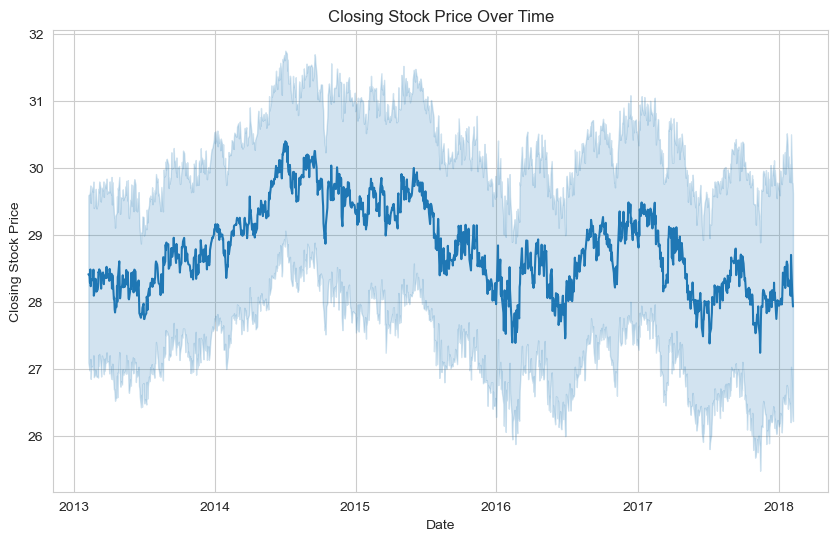

In [13]:
#the closing stock prices have increased over time, with some fluctuations.
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close', data=sp_df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

Text(0, 0.5, 'Closing Stock prices')

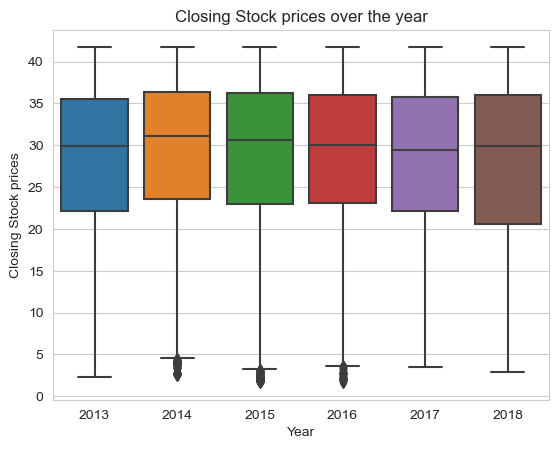

In [14]:
sp_df['year']=sp_df['date'].dt.year
sns.boxplot(x='year',y='close',data=sp_df)
plt.title('Closing Stock prices over the year')
plt.xlabel('Year')
plt.ylabel('Closing Stock prices')

Text(0.5, 1.0, 'Correlation betweeb stock prioces')

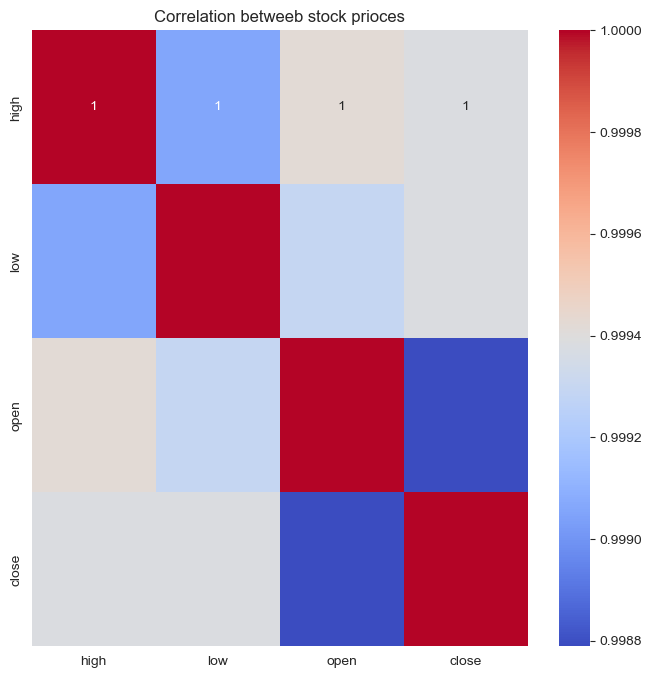

In [15]:
# the correlation between the stock prices 
corr=sp_df[['high','low','open','close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation betweeb stock prioces')


c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

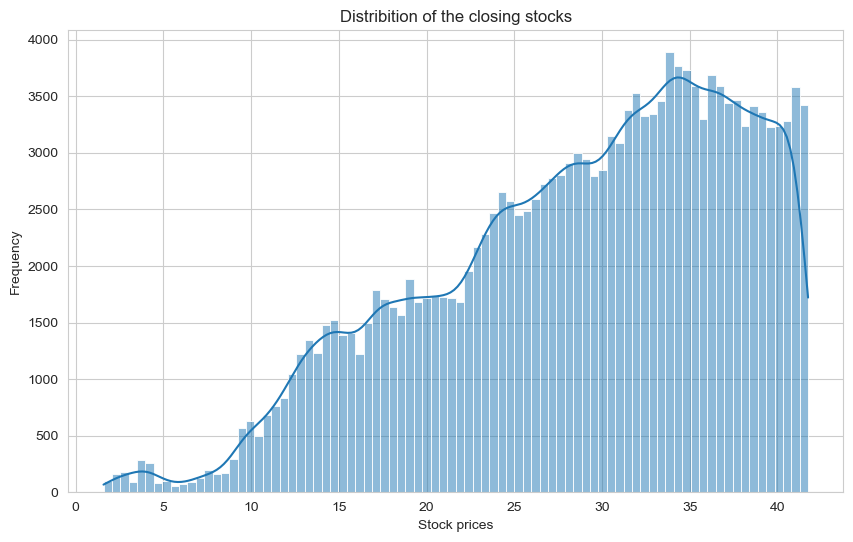

In [16]:
# the distribution of the target variable, which in this case is the closing stock price
plt.figure(figsize=(10,6))
sns.histplot(data=sp_df,x='close',kde=True)
plt.title('Distribition of the closing stocks')
plt.xlabel('Stock prices')
plt.ylabel('Frequency')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Closing Stock Price')

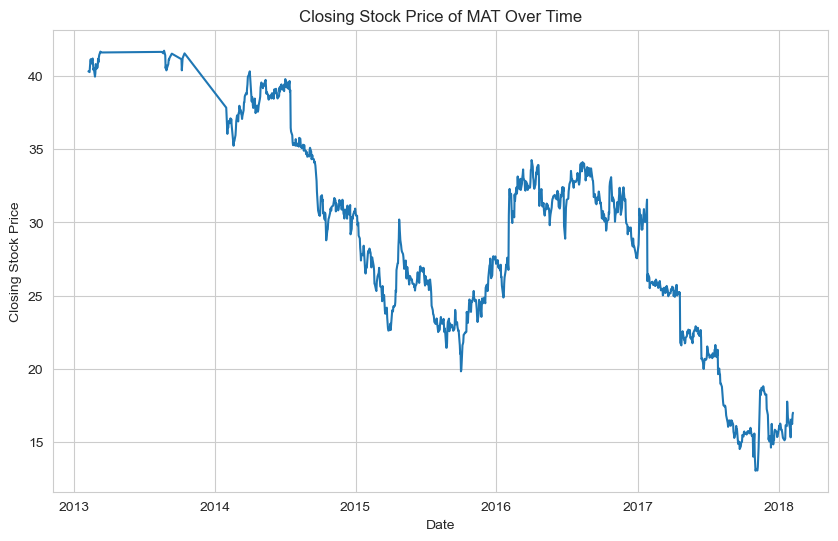

In [26]:
# visualize the stock prices for individual companies using a line chart. We can filter the dataset based on the company name and plot the closing stock price over time.
company_name='MAT'
company_df = sp_df[sp_df['Name']==company_name]
plt.figure(figsize=(10,6))
sns.lineplot(x='date',y='close',data=company_df)
plt.title(f'Closing Stock Price of {company_name} Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

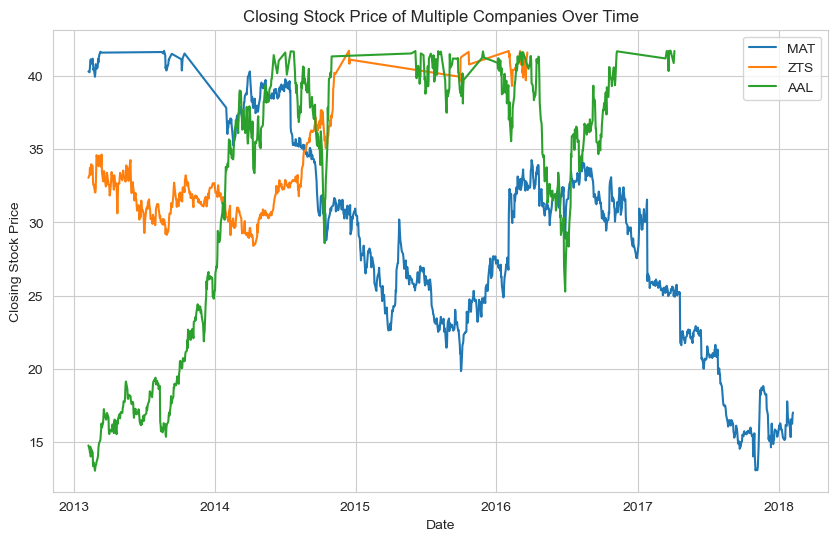

In [36]:
# visualize the stock prices for multiple companies
companies=['MAT','ZTS','AAL']
plt.figure(figsize=(10,6))

for company in companies:
    company_df=sp_df[sp_df['Name']==company]
    sns.lineplot(x='date',y='close',data=company_df,label=company)
plt.title('Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()

    

Text(0, 0.5, 'Daily Return')

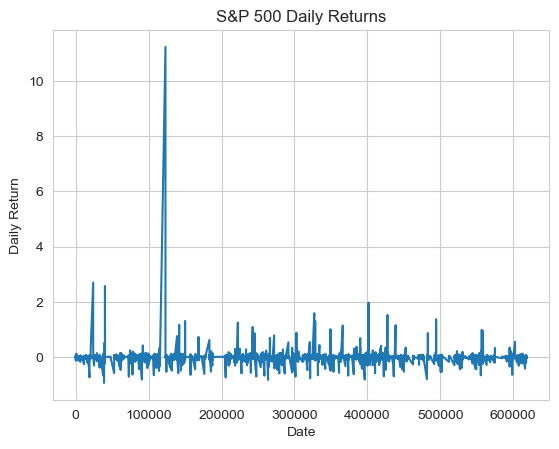

In [38]:
#This will create a line chart showing the daily returns over time.
daily_returns=sp_df['close'].pct_change()
plt.plot(daily_returns.index,daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

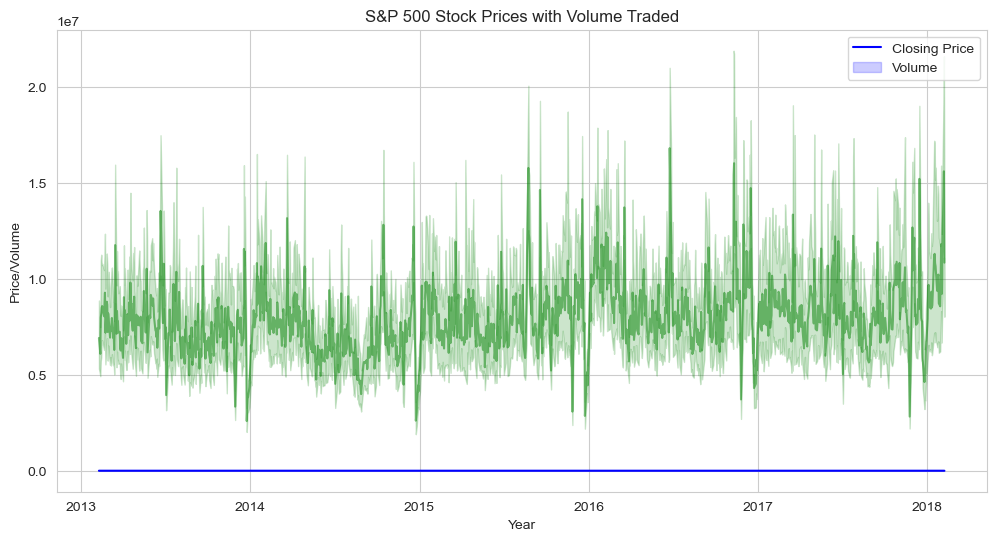

In [40]:
# combination chart to visualize the stock prices with the volume traded.
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='date',y='close',data=sp_df,color='b')
sns.lineplot(x='date',y='volume',data=sp_df,color='g',alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])

c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

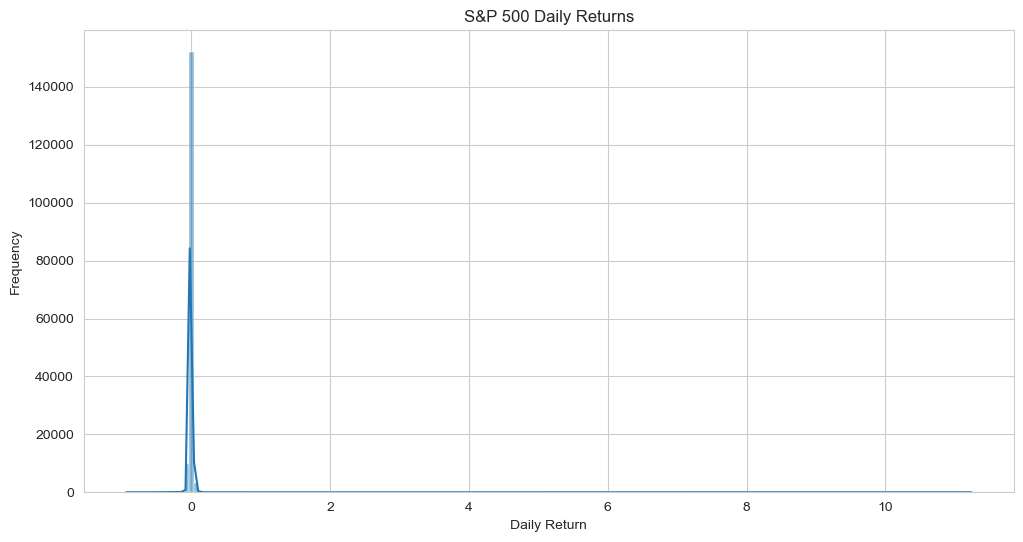

In [47]:
plt.figure(figsize=(12,6))

sns.histplot(sp_df['close'].pct_change().dropna(), bins=200, kde=True)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')